In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist as fm

In [50]:
(x_train, y_train), (x_test, y_test) = fm.load_data()

In [51]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [52]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

In [53]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [54]:
y_train_encoded = one_hot_encode(y_train, 10)
y_test_encoded = one_hot_encode(y_test, 10)

In [57]:
# Let's modify the neural network code to add the comparison between L1 and L2 regularization.

from matplotlib import pyplot as plt
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, l2_lambda=0.001):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.loss_history = []

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / (np.sum(exp_x, axis=1, keepdims=True) + 1e-10)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]
        output_error = output - y
        hidden_error = np.dot(output_error, self.W2.T) * (1 - np.tanh(self.z1) ** 2)

        dW2 = np.dot(self.a1.T, output_error) / m
        db2 = np.sum(output_error, axis=0, keepdims=True) / m
        dW1 = np.dot(X.T, hidden_error) / m
        db1 = np.sum(hidden_error, axis=0, keepdims=True) / m

        # L2 regularization
        dW1 += self.l2_lambda * self.W1
        dW2 += self.l2_lambda * self.W2

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs, regularization_type="L2"):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # Calculate loss with regularization penalties
            penalty = self.l2_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))

            loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1)) + penalty
            self.loss_history.append(loss) 

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)


nn = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, learning_rate=0.1, l2_lambda=0.001)

epochs = 500

nn.train(x_train, y_train_encoded, epochs=epochs, regularization_type="L2")

predictions = nn.predict(x_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy*100:.4f}")

Epoch 0, Loss: 2.3168
Epoch 10, Loss: 2.2301
Epoch 20, Loss: 2.0053
Epoch 30, Loss: 1.6945
Epoch 40, Loss: 1.4763
Epoch 50, Loss: 1.3260
Epoch 60, Loss: 1.2124
Epoch 70, Loss: 1.1228
Epoch 80, Loss: 1.0513
Epoch 90, Loss: 0.9935
Epoch 100, Loss: 0.9464
Epoch 110, Loss: 0.9076
Epoch 120, Loss: 0.8753
Epoch 130, Loss: 0.8479
Epoch 140, Loss: 0.8244
Epoch 150, Loss: 0.8038
Epoch 160, Loss: 0.7855
Epoch 170, Loss: 0.7690
Epoch 180, Loss: 0.7540
Epoch 190, Loss: 0.7403
Epoch 200, Loss: 0.7276
Epoch 210, Loss: 0.7158
Epoch 220, Loss: 0.7049
Epoch 230, Loss: 0.6946
Epoch 240, Loss: 0.6851
Epoch 250, Loss: 0.6762
Epoch 260, Loss: 0.6678
Epoch 270, Loss: 0.6600
Epoch 280, Loss: 0.6526
Epoch 290, Loss: 0.6456
Epoch 300, Loss: 0.6390
Epoch 310, Loss: 0.6328
Epoch 320, Loss: 0.6270
Epoch 330, Loss: 0.6214
Epoch 340, Loss: 0.6162
Epoch 350, Loss: 0.6112
Epoch 360, Loss: 0.6065
Epoch 370, Loss: 0.6020
Epoch 380, Loss: 0.5977
Epoch 390, Loss: 0.5936
Epoch 400, Loss: 0.5897
Epoch 410, Loss: 0.5860
Epo

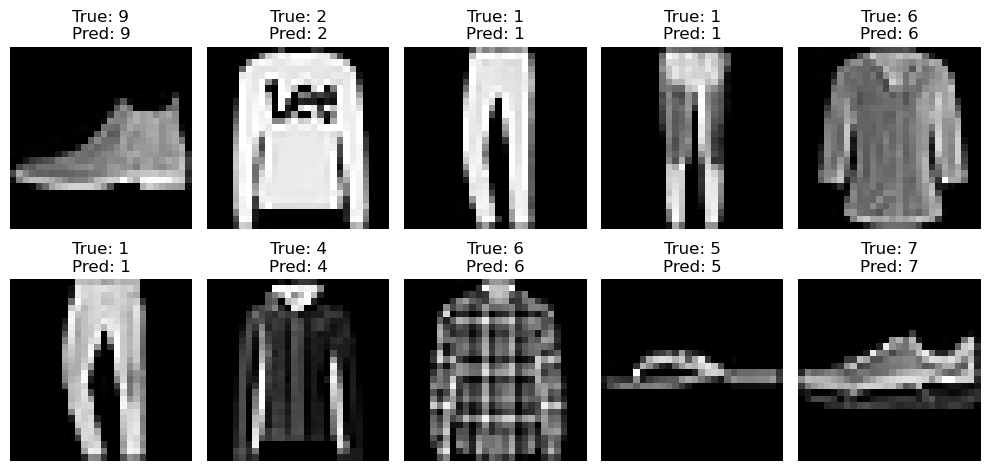

In [58]:
# Visualize some predictions
def plot_predictions(X, y_true, y_pred, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[i]}\nPred: {y_pred[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize predictions on test set
plot_predictions(x_test, y_test, predictions)